In [47]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 15, 20

In [39]:
df = pd.read_csv('outputs/daily_all_cities_all_pollutants.csv')

In [37]:
def scatter_plot(data, x, y, title):
    groups = data.groupby('city')

    # Plot
    fig, ax = plt.subplots()
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
    for name, group in groups:
        ax.plot(group[x], group[y], marker='o', linestyle='', ms=2, label=name)
    ax.legend()
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(title)
    return plt


In [34]:
df.head()

,city,measurement,pollutant,date,AirQualityStationEoICode,Concentration,Validity,Verification,hour,year,2am,5pm,0am,Temperature,Wind Speed,Precipitation
0,London,µg/m3,PM10,2016-01-01,NaN,22.124899,0.885417,1.0,8.625,2016.0,53.440000,15.266667,18.968429,6.5,0.2,0.0
1,London,µg/m3,PM10,2016-01-02,NaN,9.830687,1.072917,1.0,8.625,2016.0,8.016667,11.000000,11.272875,10.4,0.2,0.8
2,London,µg/m3,PM10,2016-01-03,NaN,12.225542,1.078125,1.0,8.625,2016.0,4.200000,10.333333,9.618250,8.8,0.2,0.6
3,London,µg/m3,PM10,2016-01-04,NaN,18.273917,1.000000,1.0,8.625,2016.0,19.066667,23.650000,23.188500,9.2,0.1,0.0
4,London,µg/m3,PM10,2016-01-05,NaN,20.040750,1.015625,1.0,8.625,2016.0,8.133333,27.183333,16.009500,9.0,0.1,0.0


In [36]:
df.describe()

,AirQualityStationEoICode,Concentration,Validity,Verification,hour,year,2am,5pm,0am,Temperature,Wind Speed,Precipitation
count,0.0,32857.000000,32882.000000,32882.0,32882.000000,32882.000000,30285.000000,30270.000000,32823.000000,32748.000000,32748.000000,32748.000000
mean,NaN,33.492033,0.933912,1.0,10.126609,2016.999209,25.177154,35.739752,29.822266,13.595227,18.112037,0.778933
std,NaN,30.406256,0.199931,0.0,3.204589,0.816819,25.380925,37.857335,31.202007,7.609802,8.466366,2.738416
min,NaN,0.930000,-1.270833,1.0,0.000000,2016.000000,-1.700000,-2.900000,-0.700000,-9.600000,0.000000,0.000000
25%,NaN,14.231500,0.958333,1.0,11.458333,2016.000000,10.906799,13.000000,12.525215,7.700000,11.600000,0.000000
50%,NaN,25.314344,1.000000,1.0,11.500000,2017.000000,18.766667,25.024760,21.291583,13.000000,16.800000,0.000000
75%,NaN,42.651200,1.000000,1.0,11.500000,2018.000000,31.418182,45.361726,36.862325,19.200000,22.900000,0.200000
max,NaN,558.011271,1.888889,1.0,13.833333,2019.000000,661.946356,713.352941,994.598889,33.900000,90.700000,51.000000


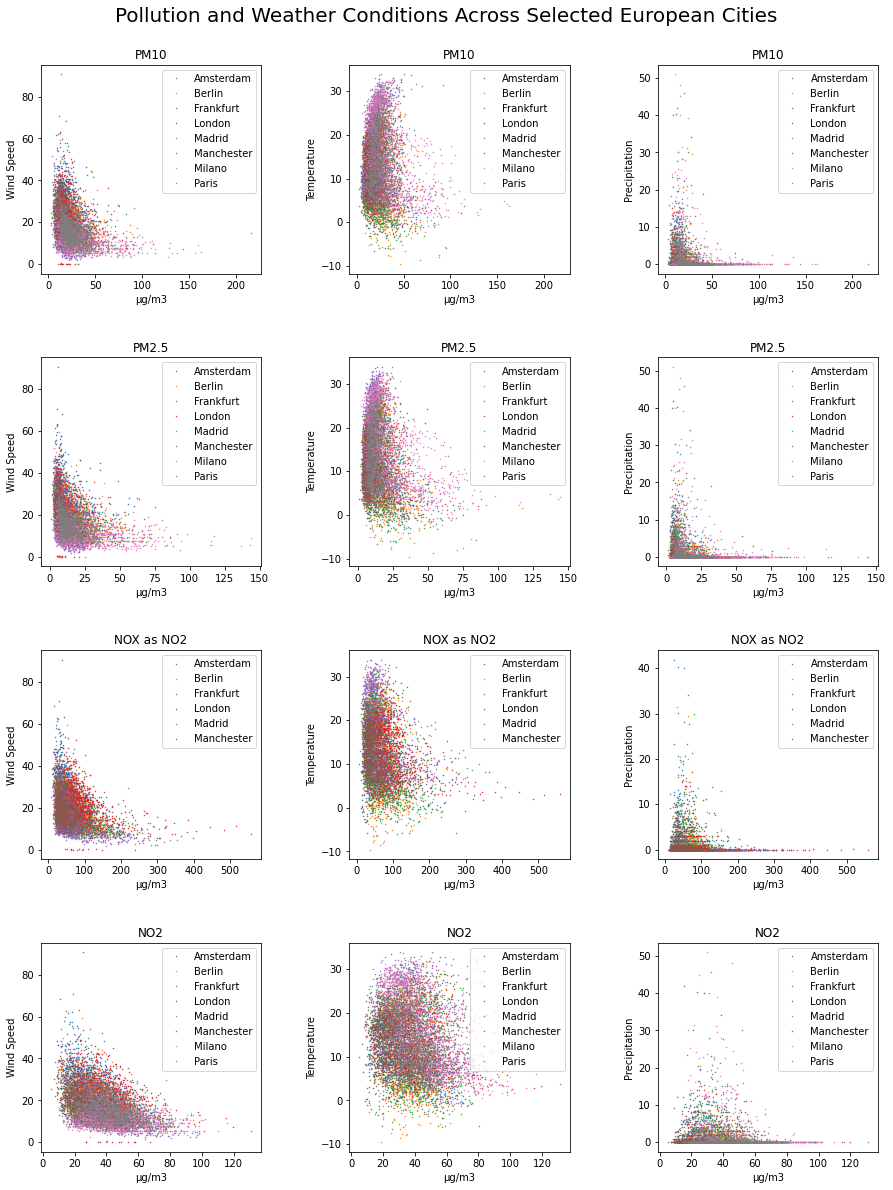

In [61]:
varabs = ['Wind Speed', 'Temperature', 'Precipitation']
polls = df['pollutant'].unique()
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
i = 1
for poll in polls:
    df_pol = df[df['pollutant'] == poll]
    for varab in varabs:
        if i > 12:
            break
        else:
            ax = fig.add_subplot(4, 3, i)
            groups = df_pol.groupby('city')
            for name, group in groups:
                ax.plot(group['Concentration'], group[varab], marker='o', linestyle='', ms=.5, label=name)
            ax.legend()
            ax.set_xlabel(df_pol['measurement'].iloc[0])
            ax.set_ylabel(varab)
            ax.set_title(poll)
            i += 1 
fig.suptitle('Pollution and Weather Conditions Across Selected European Cities', fontsize=20,  y=0.92)
plt.show()